**Кулешов Иван AML-14**

# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


# Решение

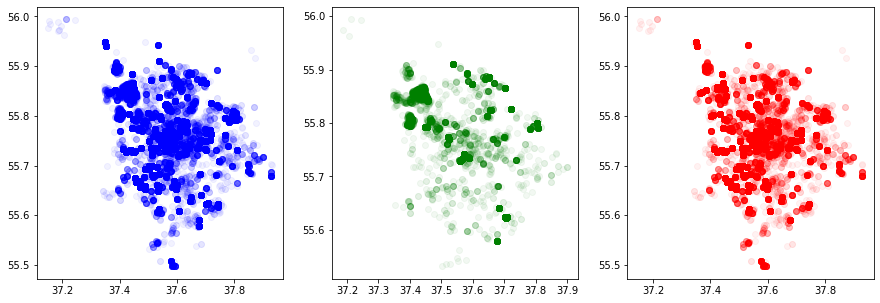

In [ ]:
# отобразим распределение голосов на карте
data_pos = data[data.comment_class==1]
data_neg = data[data.comment_class==-1]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.scatter(x=data.x, y=data.y, alpha=0.05, color='b', label='Все голоса')
ax2.scatter(x=data_pos.x, y=data_pos.y, alpha=0.05, color='g', label='Позитивные')
ax3.scatter(x=data_neg.x, y=data_neg.y, alpha=0.05, color='r', label='Негативные')

In [ ]:
# данные для исследования
X = data[['x','y']]
y = data[['comment_class']]

## Кластеризация

In [ ]:
from sklearn.cluster import KMeans

### KMeans и метод локтя

Метод локтя подразумевает минимизацию следующей функции:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

Произведем сначала расчет inertia для диапазона N кластеров, затем отобразим график приведенной выше формулы:

In [ ]:
# Функция расчета inertia для kn кластеров
def get_inertia(X, kn=8):
  k_inertia = [KMeans(n_clusters=k).fit(X).inertia_/100 for k in range(1,kn + 1)]
  return k_inertia

def get_arg_inertia(k_inertia):
  arg_inertia = [(k_inertia[k+1] - k_inertia[k]) / 
                 (k_inertia[k] - k_inertia[k-1]) for k in range(1,len(k_inertia)-1)]
  return np.abs(arg_inertia)

# Функция построения графика для инерция и для минимизируемой функции
def plot_inertia(k_inertia):
    plt.figure(figsize=(12, 8))
    plt.plot(range(1,1 + len(k_inertia)), k_inertia, marker='o')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Inertia')
    plt.show()

    arg_inertia = get_arg_inertia(k_inertia)
    plt.figure(figsize=(12, 8))
    plt.plot(range(2,2 + len(arg_inertia)), arg_inertia, marker='o')
    plt.axvline(x=2+np.argmin(arg_inertia), linestyle='-',color='black',label='минимум')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Argmin')
    plt.show()

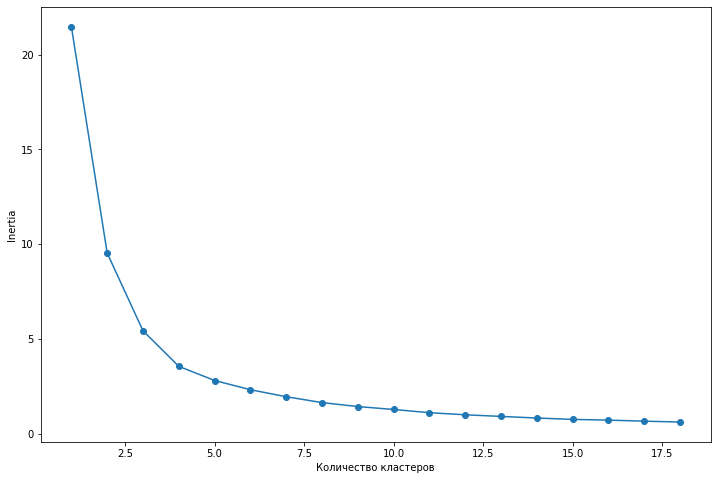

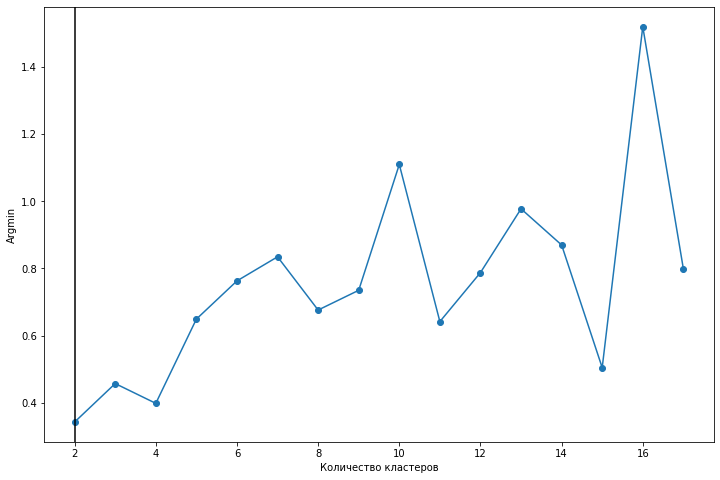

In [ ]:
plot_inertia(get_inertia(X,18))

Как, исходя из данного графика можно сделать вывод об оптимальном числе кластеров? В данном случае, это весьма затруднительно, явно выраженного минимума нет. Минимум почти всё время в точке 2, что, учитывая задачу о районах Москвы, вряд ли верно. Также, из-за случайного процесса построения алгоритма, правая часть графика после очередного запуска имеет разный рисунок, и второй локальный минимум оказывается то в точке, 12 то в точке 15..

Однако, если взглянуть на первый график, можно увидеть смену поведения для точки 10, в которой убывание нарушается. Руководствуясь этим, возьмем для иллюстрации 9 кластеров.

In [ ]:
# распределение по кластерам
clusters = KMeans(n_clusters=9).fit_predict(X)

Проиллюстрируем распределение по кластерам:

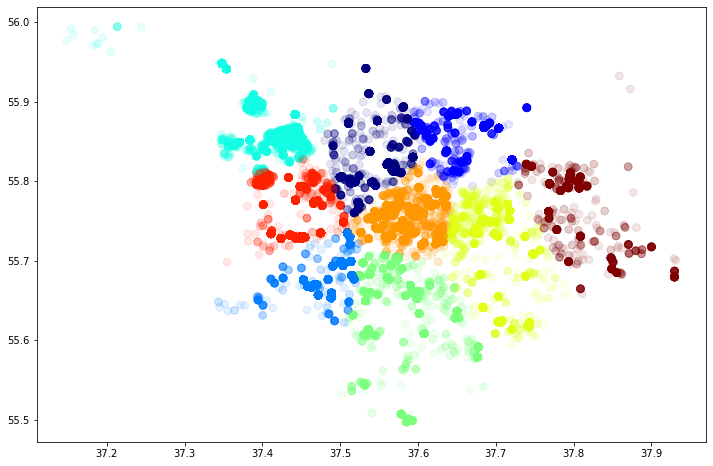

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(data.x, data.y, c=clusters, alpha=0.1, cmap='jet_r', s=60)
plt.show()

Исследуем распределение голосов "за" и "против" по отдельности.

In [ ]:
X_pos = data_pos[['x', 'y']]
X_neg = data_neg[['x', 'y']]

### Позитивное голосование

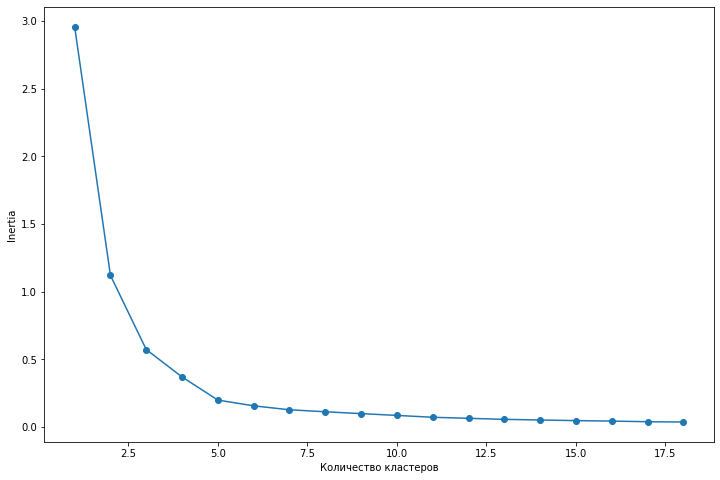

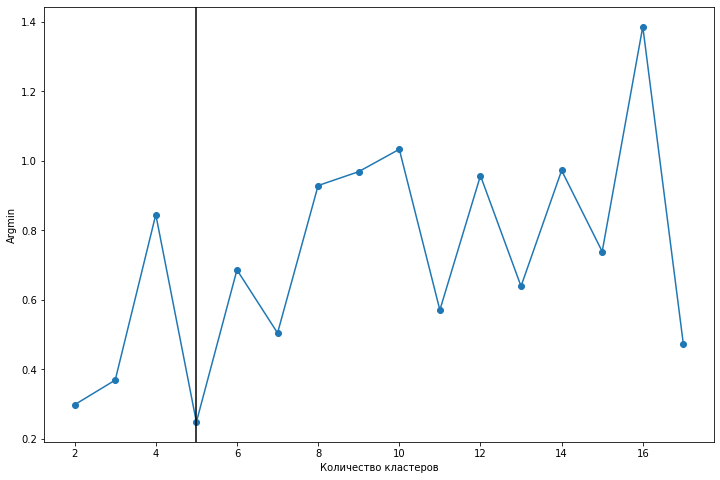

In [ ]:
plot_inertia(get_inertia(X_pos,18))

Здесь картина более красноречива - 5 кластеров

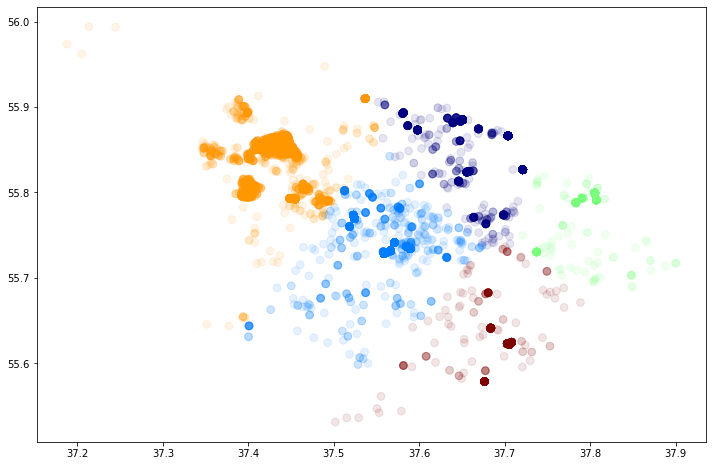

In [ ]:
clusters = KMeans(n_clusters=5).fit_predict(X_pos)

plt.figure(figsize=(12, 8))
plt.scatter(data_pos.x, data_pos.y, c=clusters, alpha=0.1, cmap='jet_r', s=60)
plt.show()

Сильно выделяется один кластер - на северо-западе.

### Негативное голосование

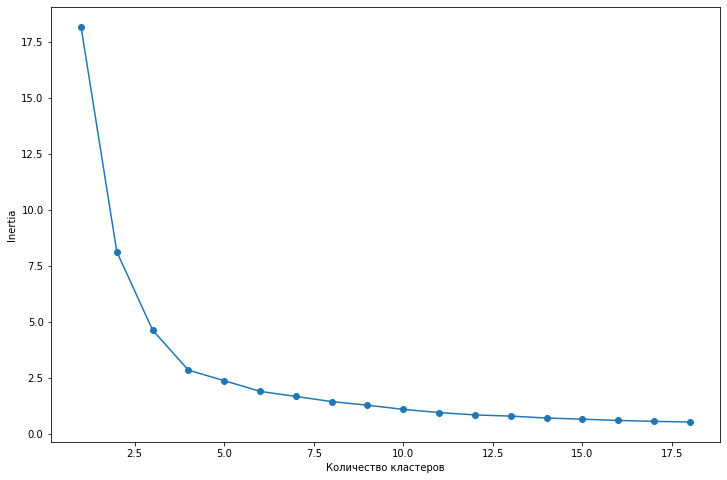

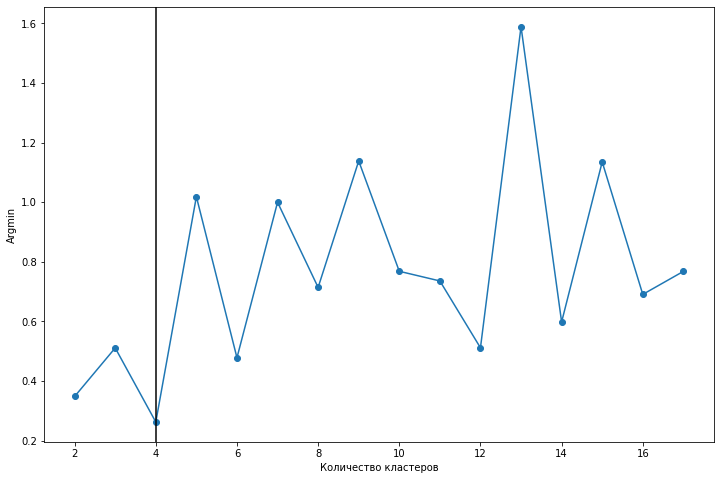

In [ ]:
plot_inertia(get_inertia(X_neg,18))

И здесь всё красноречиво - 4 кластера

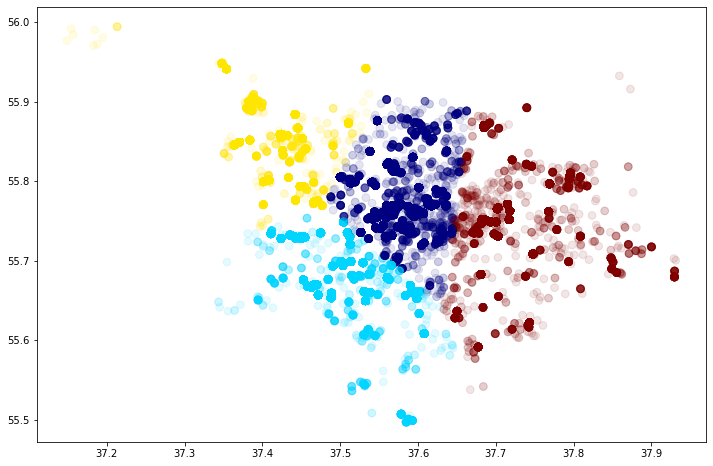

In [ ]:
clusters = KMeans(n_clusters=4).fit_predict(X_neg)

plt.figure(figsize=(12, 8))
plt.scatter(data_neg.x, data_neg.y, c=clusters, alpha=0.1, cmap='jet_r', s=60)
plt.show()

## Наиболее активные в голосовании районы с DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbs = DBSCAN(eps=0.02, min_samples=3000, algorithm='kd_tree')
clusters = dbs.fit_predict(X)

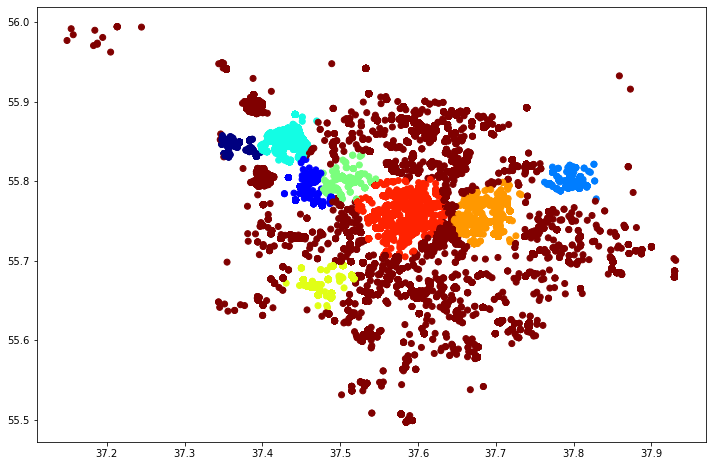

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X['x'], X['y'], c=clusters, cmap='jet_r');

Цветом выделены самые активные районы

## Основные тематики комментариев жителей

Загрузим данные с комментариями

In [176]:
data = pd.read_excel('geo_comment.xlsx')

text = data.comment

Модули для работы с текстом

In [ ]:
# Модель для нормализации слов и морфологического анализа
!pip install pymorphy2

In [ ]:
import pymorphy2
import re

import nltk
from nltk.tokenize import sent_tokenize # разбивает на предложения
from nltk.corpus import stopwords # стоп-слова
from nltk.tokenize import word_tokenize # разбивает на слова

In [ ]:
morph = pymorphy2.MorphAnalyzer()
nltk.download('stopwords')
stop_words = stopwords.words('russian')
nltk.download('punkt')

Осуществим следующую процедуру:
- каждый комментарий разделим на отдельные русские слова
- приведем к нижнему регистру
- исключим стоп-слова и слова меньше 4 символов
- каждое слово приведем к нормальной форме

Поскольку на всей выборке комментариев будет считаться долго, случайно выберем 14 000

In [177]:
ind = np.random.choice(len(text), 14000, replace=False)
text = text[ind]

По ранее проведённому анализу - список слов, которые имеют наибольшую пересекаемость во всех темах, то есть, являются неинформативными, а общими словами.

In [178]:
stop_words_norm = ['адрес', 'город', 'данный', 'дом', 'житель', 'застройка', 'здание', 'зона', 'комплекс', 'который', 'москва', 'наш',
                   'объект', 'предельный', 'проект', 'размещение', 'район', 'строительство', 'также', 'территория', 'указанный', 'вид',
                   'гпзу', 'градостроительный', 'документ', 'жилой', 'законодательство', 'земельный', 'использование', 'капитальный', 
                   'параметр', 'публичный', 'участок', 'часть', 'землепользование', 'кодекс', 'правило', 'слушание', 'согласно', 'соответствие']

Формируем для каждого комментария список слов, приведенных к нормальному виду, исключая стоп-слова и слова с небольшой длиной

In [180]:
tokens = [] # будет содержать список всех слов из всех комментариев

for text_ in text:
  t = text_
  # Проводим замены
  text_ = re.sub(r"\xa0"," ", text_)
  text_ = re.sub(r"\(","( ", text_)
  text_ = re.sub(r"\.",". ", text_)
  text_ = re.sub(r"[^А-Яа-яёЁ ]","", text_)
  text_ = str.lower(text_)
  
  # разбиваем на отдельные слова
  words = nltk.word_tokenize(text_, language="russian")

  # удаляем если слова в списке стоп-слов
  words = [word for word in words if (word not in stop_words)]

  # оставляем только слова больше 3 символов
  words = [word for word in words if len(word)>3]

  #приводим к нормальному виду
  words = [morph.parse(word)[0].normal_form for word in words]

  # удаляем если приведенные слова в списке стоп-слов
  words = [word for word in words if (word not in stop_words_norm)]

  tokens.append(words)

Для тематического моделирования используем LDA модель.

In [ ]:
from gensim.corpora import TextCorpus, Dictionary
from gensim.models.ldamodel import LdaModel

# Для LDA необходим словарь слов, а также корпус - состоящий из частот встречаемости словарного слова в тексте
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

class ListTextCorpus(TextCorpus):
    def get_texts(self):
        for doc in self.input:
            yield doc

corp = ListTextCorpus(input=tokens)

# моделируем на 4 темы
ldamodel = LdaModel(corpus, num_topics = 4, id2word=dictionary, passes=5, minimum_phi_value=0.05)

In [193]:
# Получаем описание 4 тематик
print('LdaModel описание тем:')
for i in range(4):
    terms = ldamodel.get_topic_terms(i,50)
    print(i, ' '.join(map(lambda x: corp.dictionary.get(x[0]), terms)))

LdaModel описание тем:
0 природный требовать шоссе общественный серп молотый энтузиаст план проезд культурный наследие установить назначение природоохранный против отвести транспортный изменение завод плотность функциональный производственный планировка год генеральный округ ограниченный процент земля кольцо третий обеспечить охрана северный провести существующий метр золоторожский ленинградский этаж граница либо корпус постановление книга социальный должный считать какой правительство
1 округ административный северозападный новый разрешить просить плотность спортивный участник площадь должный парковый высота дать против любой установить являться помещение развитие номер ребёнок внести центр кадастровый площадка поддерживать детский протокол инфраструктура благоустройство проезд доработка процент замечание категорически северный возражать общий требовать необходимый отклонить место план отправить улица основной максимально предложениятребовать ограниченный
2 станция митино метро требов

Для иллюстрации тем отлично подходит модуль pyLDAvis, он визуализирует близость и важность тем, а также ключевые слова, их определяющие:

In [ ]:
pip install pyLDAvis

In [194]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

# Выводы:
Сложно сказать, насколько качественно выделены тематики, то можно сделать следующие выводы:

- пересечение тем почти отсутствует, только  у первой и второй темы, которые довольно близки
- Тема1, судя по обилию государствообразующих и законных токенов, - "нормативный", "государство", "правовой", "президент", "глава" и т.д. - это тематика **Юридически-правовая**
- Тема2, судя по обилию местных топонимов - "Митино", "Щелковский", "Панфиловец", "Введенский", а также "кладбище", "вырубка", "кинотеатр" - это некий местный крик о наболевшем, тематика **Местное**
- Тема3, эксплуатирует термины охранного дискурса, - "ландшафт", "природоохранный", "дореволюционный", "водохранилище", с теми же местными реалиями и топонимами, - это тема, по-видимому, выражает, заботу о сохранении культурного наследения и целесообразности застройки, тематика **Природоохрана**
- Тема4, "украшение", "танец", "художественный", "театральный", "музыкальный", а также "оборудовать", "улучшить" и "велодорожка". Если Тема3 - это стан беспокояшихся и опасающихся, то Тема4 - это своеобразная надежда о хорошем, об эстетике и прочих улучшениях, тематика **Ожидание улучшений**